c:\Users\ASUS\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21284\3663852795.py:37: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = peak_signal_noise_ratio(img_array, compressed_img)


AttributeError: 'numpy.ndarray' object has no attribute 'convert'

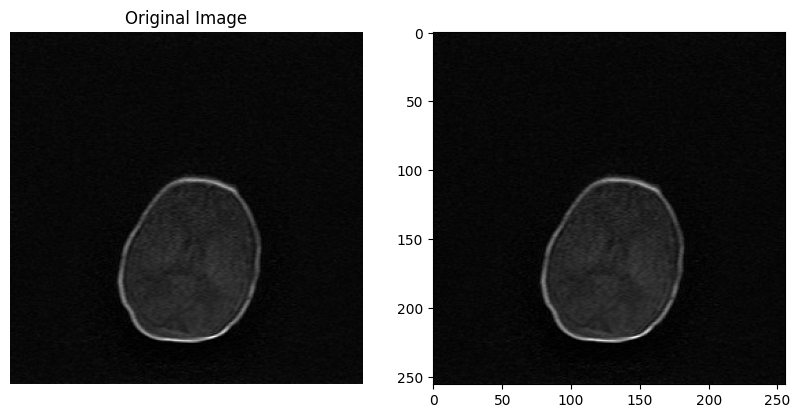

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
import os

def calculate_mse(image1, image2):
    # Calculate the mean squared error
    mse = np.mean((image1 - image2) ** 2)
    return mse

# Load the image
img_original = Image.open('../test.jpg').convert('L')  # Convert to grayscale
img = img_original.resize((256, 256))  # Resize image to 256x256

# Convert the image to a numpy array
img_array = np.array(img)

# Reshape the image array
w, h = img_array.shape
image_array = img_array.reshape((w * h, 1))

# Perform K-means clustering
n_colors = 64  # Number of colors for compression
kmeans = KMeans(n_clusters=n_colors, random_state=42)
kmeans.fit(image_array)

# Get the labels and cluster centers
labels = kmeans.predict(image_array)
cluster_centers = kmeans.cluster_centers_

# Create the compressed image
compressed_img = cluster_centers[labels].reshape((w, h))

# Calculate PSNR (Peak Signal-to-Noise Ratio)
psnr = peak_signal_noise_ratio(img_array, compressed_img)

# Calculate compression ratio
original_size = img_array.size * 8  # Original image size in bits (assuming 8 bits per pixel)
compressed_size = labels.size * np.log2(n_colors)  # Compressed image size in bits
compression_ratio = original_size / compressed_size

# Calculate MSE
mse = calculate_mse(img_array, compressed_img)

# Calculate SSIM (Structural Similarity Index)
data_range = img_array.max() - img_array.min()  # Data range of the image
ssim = structural_similarity(img_array, compressed_img, data_range=data_range)

# Display the original and compressed images
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compressed_img, cmap='gray')
plt.imsave('../compressed_kmeans.jpg', compressed_img.convert('L'))
plt.title('Compressed Image (K-means)')
plt.axis('off')

plt.show()


# Print the calculated metrics
print(f"PSNR: {psnr:.2f} dB")
print(f"Compression Ratio: {compression_ratio:.2f}")
print(f"MSE: {mse:.2f}")
print(f"SSIM: {ssim:.4f}")
